# Numerov algorithm

In [2]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Discretización del dominio - Punto c
def x_discrete(a,b):
    return np.linspace(-5,5,1000)
x = x_discrete(-5,5)

In [57]:
#Potential - Punto D
def potential (x,w):
    return (1/2)*w*(x**2)

#Otros potenciales -Punto i,j
def gaussianPotential(x):
    return -10*np.exp(-(x**2)/20)

def rationalPotential(x):
    return -4/((1+x**2)**2)

In [58]:
#Algoritmo de numerov - Punto e
def phi2(x_array,E):

    w = 1
    h_barra = 1
    m = 1
    h = 10/999
    result = []

    i = 0
    norm = 0 # Para normalizar el resultado
    for x in x_array:


        if i ==0:
            result.append(0)
        elif i ==1:
            result.append(1e-5)
            norm+=1e-5
        else:
            r_n = ((2*m)/(h_barra**2))*(potential(x_array[i],w)-E)
            r_n_minus_1= ((2*m)/(h_barra**2))*(potential(x_array[i-1],w)-E)
            r_n_minus_2= ((2*m)/(h_barra**2))*(potential(x_array[i-2],w)-E)

            num = (2*result[i-1]*(1+((5*(h**2)*r_n_minus_1)/(12))))-(result[i-2]*(1-(((h**2)*r_n_minus_2)/(12))))
            den = (1-(((h**2)*r_n)/(12)))

            result.append(num/den)
            norm+=abs(num/den)
        i+=1

    #Normalizar
    result = np.array(result)
    result/=norm
    result = list(result)

    return result

In [59]:
#Valores propios función - Punto f

def findEigenvalues(e_0,e_f,dE,x):

    e = e_0
    eigenValues = []

    while e <= e_f:
        phi_E = phi2(x,e)[-1]
        phi_dE=phi2(x,e+dE)[-1]

        if phi_E*phi_dE <0:
            eigenValues.append(round(e,2))

        e+=dE
        print(e)

    return eigenValues

#Valores propios para potencial 1/2**w*x**2- punto g
eigen = findEigenvalues(0,6,0.01,x)
print("Los valores propios para el operador de energía son:\n {}".format(eigen))

0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.07
0.08
0.09
0.09999999999999999
0.10999999999999999
0.11999999999999998
0.12999999999999998
0.13999999999999999
0.15
0.16
0.17
0.18000000000000002
0.19000000000000003
0.20000000000000004
0.21000000000000005
0.22000000000000006
0.23000000000000007
0.24000000000000007
0.25000000000000006
0.26000000000000006
0.2700000000000001
0.2800000000000001
0.2900000000000001
0.3000000000000001
0.3100000000000001
0.3200000000000001
0.3300000000000001
0.34000000000000014
0.35000000000000014
0.36000000000000015
0.37000000000000016
0.38000000000000017
0.3900000000000002
0.4000000000000002
0.4100000000000002
0.4200000000000002
0.4300000000000002
0.4400000000000002
0.45000000000000023
0.46000000000000024
0.47000000000000025
0.48000000000000026
0.49000000000000027
0.5000000000000002
0.5100000000000002
0.5200000000000002
0.5300000000000002
0.5400000000000003
0.5500000000000003
0.5600000000000003
0.5700000000000003
0.5800000000000003
0.5900000000000003
0.60000

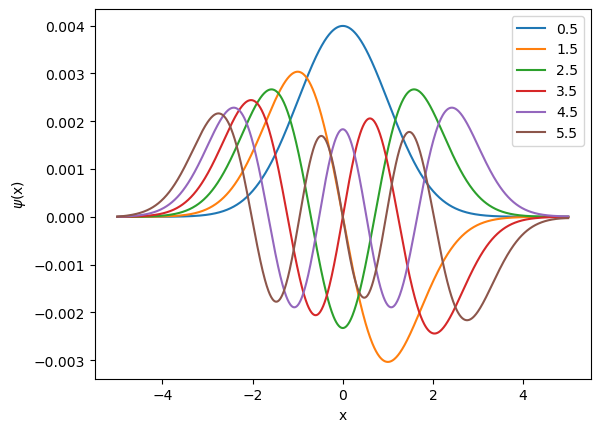

In [60]:
#Gráfico estados propios del operador -Punto h

E = [0.5,1.5,2.5,3.5,4.5,5.5]

for en in E:
    result =phi2(x,en)
    plt.plot(x,result, label = str(en))

plt.xlabel('x')
plt.legend()
plt.ylabel(r'$\psi$(x)')
plt.show()


In [66]:
# Punto i - potencial gaussiano

xg = x_discrete(-10,10)

#Algoritmo de numerov - Punto i
def phig(x_array,E):

    h_barra = 1
    m = 1
    h = 10/999
    result = []

    i = 0
    norm = 0
    for x in x_array:


        if i ==0:
            result.append(0)
        elif i ==1:
            result.append(1e-5)
            norm+=1e-5
        else:
            r_n = ((2*m)/(h_barra**2))*(gaussianPotential(x_array[i])-E)
            r_n_m= ((2*m)/(h_barra**2))*(gaussianPotential(x_array[i-1])-E)
            r_n_m_m= ((2*m)/(h_barra**2))*(gaussianPotential(x_array[i-2])-E)

            num = (2*result[i-1]*(1+((5*(h**2)*r_n_m)/(12))))-(result[i-2]*(1-(((h**2)*r_n_m_m)/(12))))
            den = (1-(((h**2)*r_n)/(12)))

            result.append(num/den)
            norm+=abs(num/den)
        i+=1

    #Normalizar
    result = np.array(result)
    result/=norm
    result = list(result)

    return result


In [62]:
#Valores propios potencial Gaussiano
def findEigenvaluesg(e_0,e_f,dE,x):

    e = e_0
    eigenValues = []

    while e <= e_f:
        phi_E = phig(x,e)[-1]
        phi_dE=phig(x,e+dE)[-1]

        if phi_E*phi_dE <0:
            eigenValues.append(round(e,3))

        e+=dE

    return eigenValues


eigeng = findEigenvaluesg(-10,-5.1,0.001,xg)
print("Los primeros cinco estados ligados para el potencial gaussiano son:\n {}".format(eigeng))

Los primeros cinco estados ligados para el potencial gaussiano son:
 [-9.51, -8.548, -7.625, -6.742, -5.899]


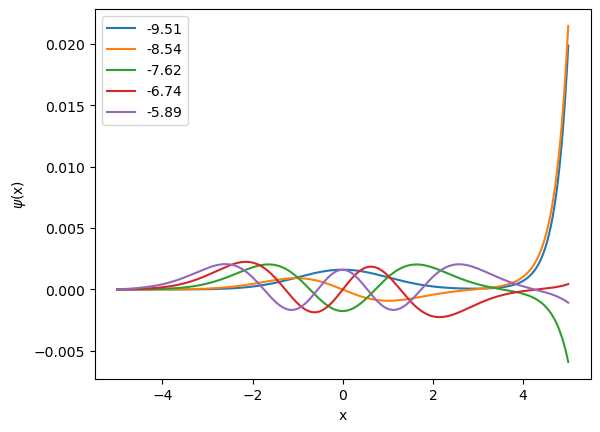

In [63]:
Eg = [-9.51,-8.54,-7.62,-6.74,-5.89]

for en in Eg:
   result =phig(xg,en)
   plt.plot(xg,result, label = str(en))

plt.legend()
plt.xlabel('x')
plt.ylabel(r'$\psi$(x)')
plt.show()

In [64]:
# Punto j - potencial racional
def phir(x_array,E):
    h_barra = 1
    m = 1
    h = 10/999
    result = []

    i = 0
    norm = 0
    for x in x_array:

        2
        if i ==0:
            result.append(0)
        elif i ==1:
            result.append(1e-5)
            norm+=1e-5
        else:
            r_n = ((2*m)/(h_barra**2))*(rationalPotential(x_array[i])-E)
            r_n_m= ((2*m)/(h_barra**2))*(rationalPotential(x_array[i-1])-E)
            r_n_m_m= ((2*m)/(h_barra**2))*(rationalPotential(x_array[i-2])-E)

            num = (2*result[i-1]*(1+((5*(h**2)*r_n_m)/(12))))-(result[i-2]*(1-(((h**2)*r_n_m_m)/(12))))
            den = (1-(((h**2)*r_n)/(12)))

            result.append(num/den)
            norm+=abs(num/den)
        i+=1

    #Normalizar
    result = np.array(result)
    result/=norm
    result = list(result)

    return result
#Valores propios potencial racional
def findEigenvaluesr(e_0,e_f,dE,x):

    e = e_0
    eigenValues = []

    while e <= e_f:
        phi_E = phir(x,e)[-1]
        phi_dE=phir(x,e+dE)[-1]

        if phi_E*phi_dE <0:
            eigenValues.append(round(e,3))
        print(e,phi_E*phi_dE)

        e+=dE

    return eigenValues


eigenr = findEigenvaluesr(-4,0.1,0.001,xg)
print("Los primeros dos estados ligados para el potencial racional son:\n {}".format(eigenr))

-4 0.0007771991667851955
-3.999 0.0007770068342472497
-3.998 0.0007768145004513437
-3.9970000000000003 0.0007766221653968993
-3.9960000000000004 0.0007764298290833659
-3.9950000000000006 0.0007762374915102031
-3.9940000000000007 0.0007760451526768506
-3.9930000000000008 0.0007758528125827392
-3.992000000000001 0.0007756604712273252
-3.991000000000001 0.0007754681286100463
-3.990000000000001 0.0007752757847303499
-3.989000000000001 0.0007750834395876628
-3.9880000000000013 0.0007748910931814339
-3.9870000000000014 0.0007746987455110867
-3.9860000000000015 0.0007745063965760618
-3.9850000000000017 0.0007743140463758102
-3.9840000000000018 0.0007741216949097497
-3.983000000000002 0.0007739293421773014
-3.982000000000002 0.0007737369881779122
-3.981000000000002 0.0007735446329110243
-3.980000000000002 0.0007733522763760541
-3.9790000000000023 0.0007731599185724165
-3.9780000000000024 0.0007729675594995478
-3.9770000000000025 0.0007727751991568755
-3.9760000000000026 0.0007725828375438221
-

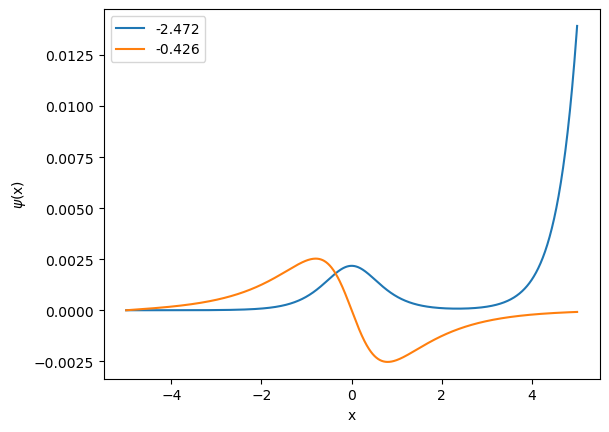

In [65]:
for en in eigenr:
   result =phir(xg,en)
   plt.plot(xg,result, label = str(en))

plt.legend()
plt.xlabel('x')
plt.ylabel(r'$\psi$(x)')
plt.show()

Nota: El calculo de los valores propios demora algunos minutos, ya que se utilizó la precisión dada en el enunciado del ejercicio